In [64]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_ff_fb"
min_generation = 0
max_generation = 1

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [66]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000015, 1 / 26 ...
reading generation_0000016, 2 / 26 ...
reading generation_0000017, 3 / 26 ...
reading generation_0000018, 4 / 26 ...
reading generation_0000019, 5 / 26 ...
reading generation_0000020, 6 / 26 ...
reading generation_0000021, 7 / 26 ...
reading generation_0000022, 8 / 26 ...
reading generation_0000023, 9 / 26 ...
reading generation_0000024, 10 / 26 ...
reading generation_0000025, 11 / 26 ...
reading generation_0000026, 12 / 26 ...
reading generation_0000027, 13 / 26 ...
reading generation_0000028, 14 / 26 ...
reading generation_0000029, 15 / 26 ...
reading generation_0000030, 16 / 26 ...
reading generation_0000031, 17 / 26 ...
reading generation_0000032, 18 / 26 ...
reading generation_0000033, 19 / 26 ...
reading generation_0000034, 20 / 26 ...
reading generation_0000035, 21 / 26 ...
reading generation_0000036, 22 / 26 ...
reading generation_0000037, 23 / 26 ...
reading generation_0000038, 24 / 26 ...
reading generation_0000039, 25 / 26 ...
reading g

In [67]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
4413,19,fish_241213_18_46_09.452702,13,False
3651,18,fish_241213_18_26_18.169482,15,False
8941,23,fish_241213_21_36_36.494014,15,False
536,15,fish_241213_17_30_09.746059,15,False
1426,16,fish_241213_17_50_14.015921,15,False
...,...,...,...,...
16435,31,fish_241214_00_56_06.491754,11057,False
17727,32,fish_241214_01_24_12.657194,11123,False
20044,35,fish_241214_01_24_07.856259,11592,True
25100,40,fish_241214_03_55_41.929206,13980,True


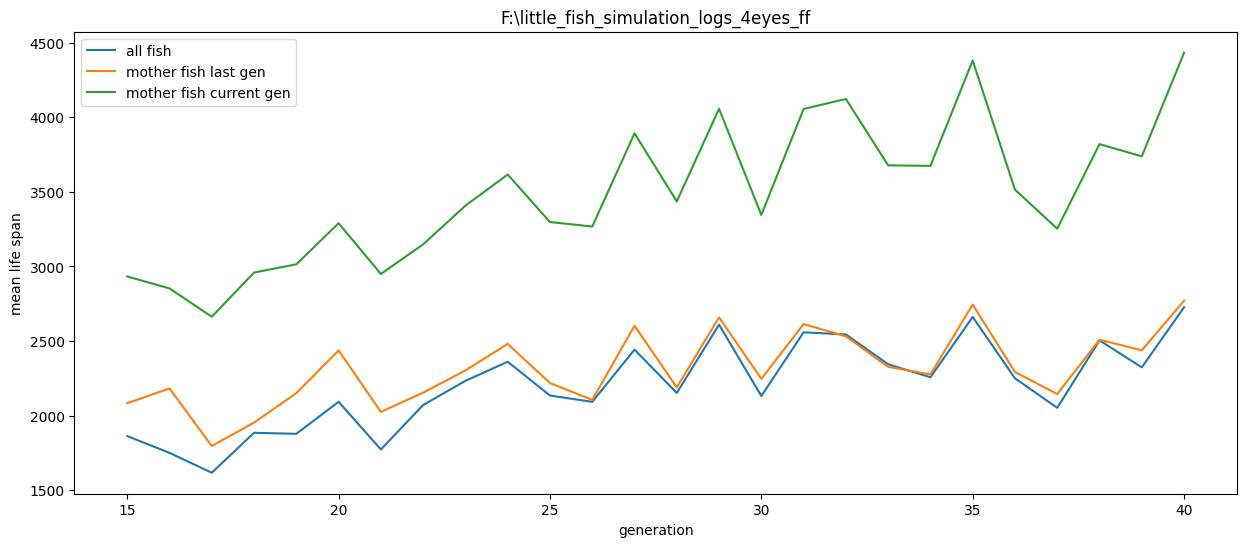

In [68]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 10000.0)

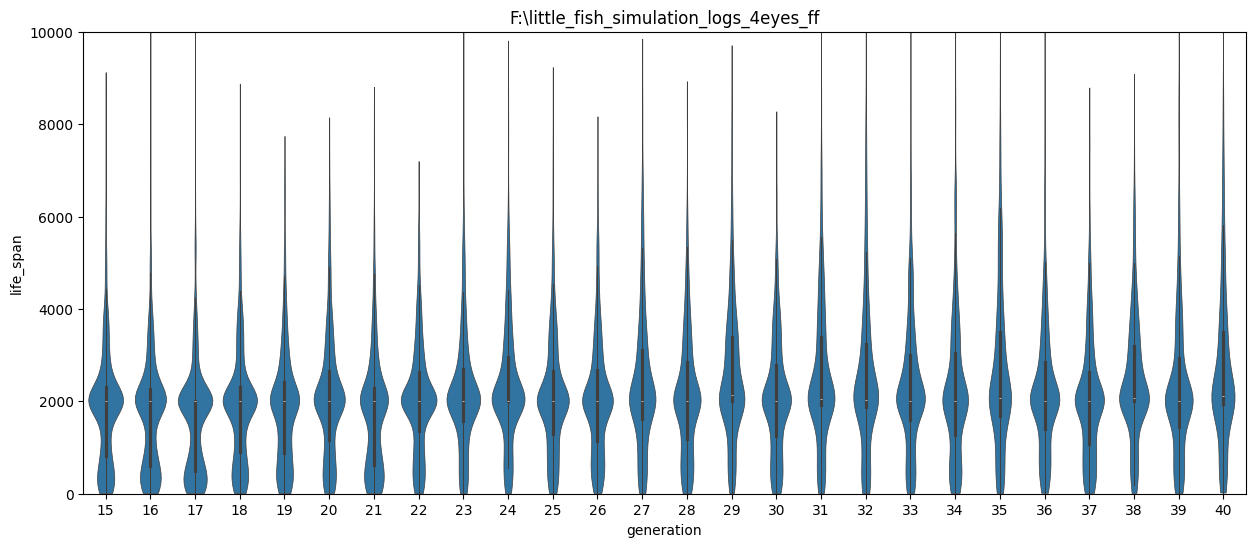

In [69]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 10000])

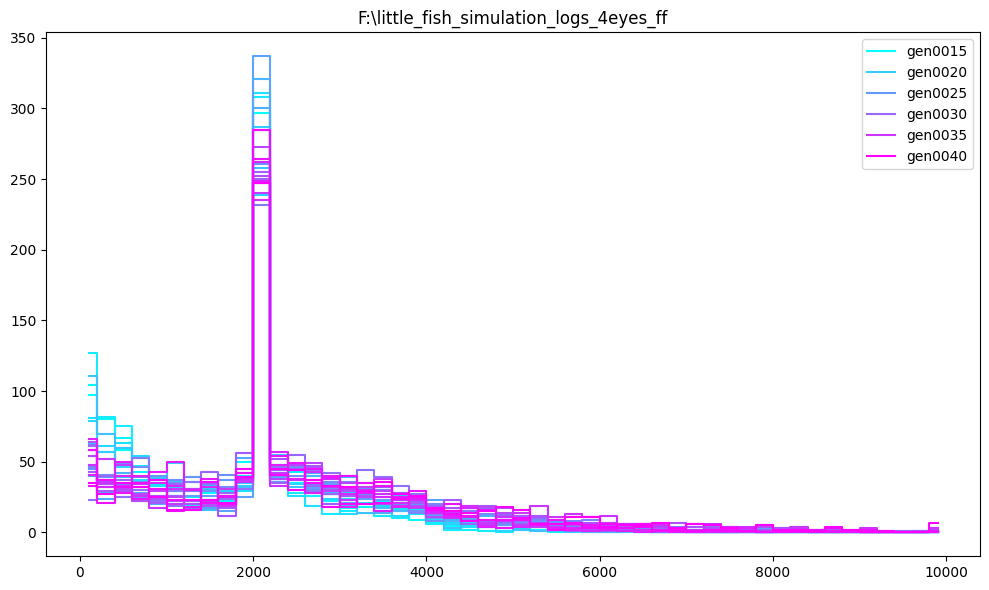

In [70]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()